<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/Clasificaci%C3%B3n/01_Exploracion_y_preprocesado_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Modelos II
## Ana Isabel Patiño Osorio
## Cristian Daniel Muñoz Botero



#### Instalación de kaggle

Se instala kaggle en el entorno virtual, se le dan permisos al token de kaggle

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Importaciones de librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Importe del dataset de Kaggle y extracción del CSV

In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-pet-adoption-status-dataset
!unzip *.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/43.6k [00:00<?, ?B/s]
100% 43.6k/43.6k [00:00<00:00, 99.4MB/s]
Archive:  predict-pet-adoption-status-dataset.zip
  inflating: pet_adoption_data.csv   


### Exploración de los datos

#### Creación del dataframe de pandas y revisión de datos

In [ ]:
df = pd.read_csv("pet_adoption_data.csv")
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [ ]:
# Visualización de las columnas del dataset
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [ ]:
# Tipos de datos de todas las columnas del dataset
df.dtypes

,0
PetID,int64
PetType,object
Breed,object
AgeMonths,int64
Color,object
Size,object
WeightKg,float64
Vaccinated,int64
HealthCondition,int64
TimeInShelterDays,int64


In [ ]:
# Descripción de las variables numéricas que no son binarias
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']].describe()

,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee
count,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,43.974091,249.142003
std,52.148363,8.327749,25.740253,142.887040
min,1.000000,1.018198,1.000000,0.000000
25%,48.000000,8.730396,21.000000,127.000000
50%,94.000000,15.925416,45.000000,242.000000
75%,138.000000,22.737180,66.000000,375.000000
max,179.000000,29.995628,89.000000,499.000000


##### Análisis datos anteriores
Según los datos anteriores, podemos observar que para:
- AgeMonths: No se observa un sesgo evidente. La media y la mediana se encuentran en un valor parecido. No tenemos valores de 0.
- WeightKg: Se puede observar que tampoco hay un sesgo evidente hacia algún lado de la distribución, ya que la media y la mediana están en un valor muy parecido. No tenemos valores de 0.
- TimeInShelterDays: La distribución de los datos se da entre 1 y 89. No se evidencia un sesgo grande hacia algún lado de la distribución.
- AdoptionFee: Presenta valores de cero. No muestra sesgo evidente.

#### Conteo de datos faltantes en el dataset

In [ ]:
df_null = df.isnull()
df_na = df.isna()
conteo_faltantes = df_null.sum(axis=0)
conteo_na = df_na.sum(axis = 0)
conteo_faltantes

,0
PetID,0
PetType,0
Breed,0
AgeMonths,0
Color,0
Size,0
WeightKg,0
Vaccinated,0
HealthCondition,0
TimeInShelterDays,0


#### Análisis de valores únicos

Verificamos cuales son los datos únicos en las columnas del dataset que no hemos descrito previamente

In [ ]:
print("Valores únicos en PetType: ", np.unique(df.PetType))
print("Valores únicos en Breed: ", np.unique(df.Breed))
print("Valores únicos en Color: ", np.unique(df.Color))
print("Valores únicos en Size: ", np.unique(df.Size))
print("Valores únicos en Vaccinated: ", np.unique(df.Vaccinated))
print("Valores únicos en HealthCondition: ", np.unique(df.HealthCondition))
print("Valores únicos en PreviousOwner: ", np.unique(df.PreviousOwner))
print("Valores únicos en AdoptionLikelihood: ", np.unique(df.AdoptionLikelihood))

Valores únicos en PetType:  ['Bird' 'Cat' 'Dog' 'Rabbit']
Valores únicos en Breed:  ['Golden Retriever' 'Labrador' 'Parakeet' 'Persian' 'Poodle' 'Rabbit'
 'Siamese']
Valores únicos en Color:  ['Black' 'Brown' 'Gray' 'Orange' 'White']
Valores únicos en Size:  ['Large' 'Medium' 'Small']
Valores únicos en Vaccinated:  [0 1]
Valores únicos en HealthCondition:  [0 1]
Valores únicos en PreviousOwner:  [0 1]
Valores únicos en AdoptionLikelihood:  [0 1]


#### Gráfica de los datos

##### Datos categóricos


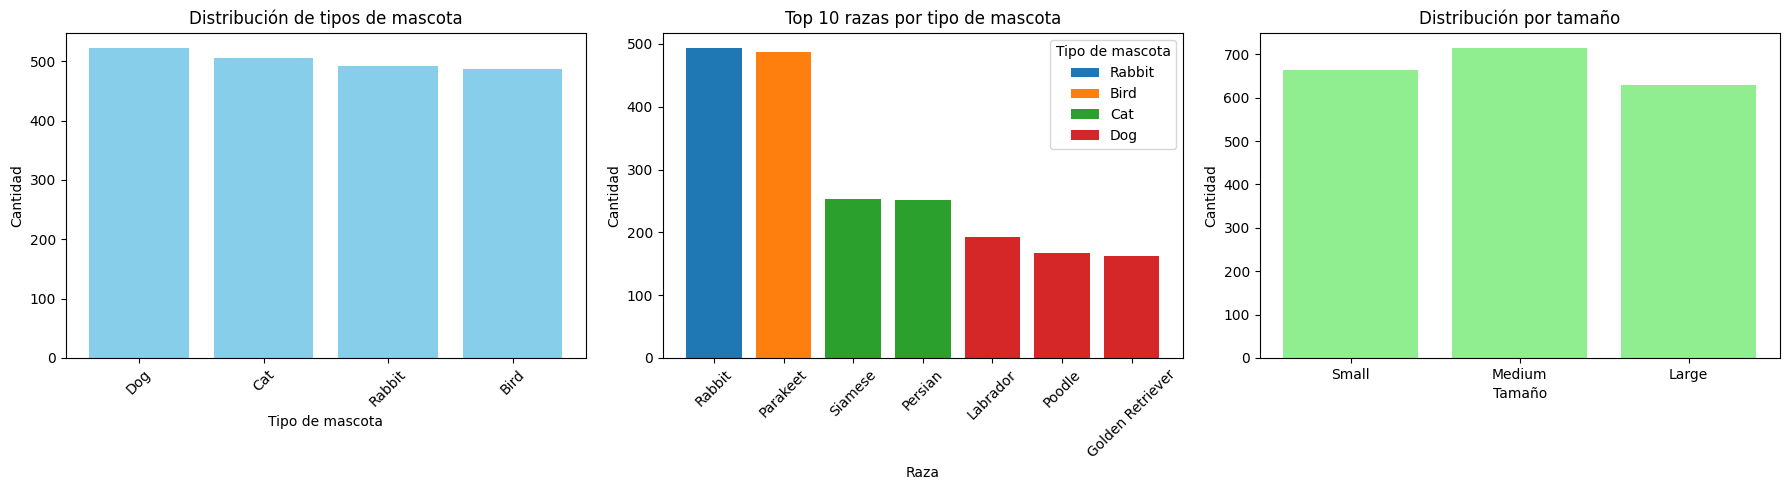

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pet_counts = df['PetType'].value_counts()
axes[0].bar(pet_counts.index, pet_counts.values, color='skyblue')
axes[0].set_title('Distribución de tipos de mascota')
axes[0].set_xlabel('Tipo de mascota')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=45)

breed_counts = df.groupby(['PetType', 'Breed']).size().reset_index(name='Count')
top_breeds = breed_counts.sort_values('Count', ascending=False).head(10)

for pet in top_breeds['PetType'].unique():
    subset = top_breeds[top_breeds['PetType'] == pet]
    axes[1].bar(subset['Breed'], subset['Count'], label=pet)

axes[1].set_title('Top 10 razas por tipo de mascota')
axes[1].set_xlabel('Raza')
axes[1].set_ylabel('Cantidad')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Tipo de mascota')

size_order = ['Small', 'Medium', 'Large']
size_counts = df['Size'].value_counts().reindex(size_order)
axes[2].bar(size_counts.index, size_counts.values, color='lightgreen')
axes[2].set_title('Distribución por tamaño')
axes[2].set_xlabel('Tamaño')
axes[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


##### Datos numéricos

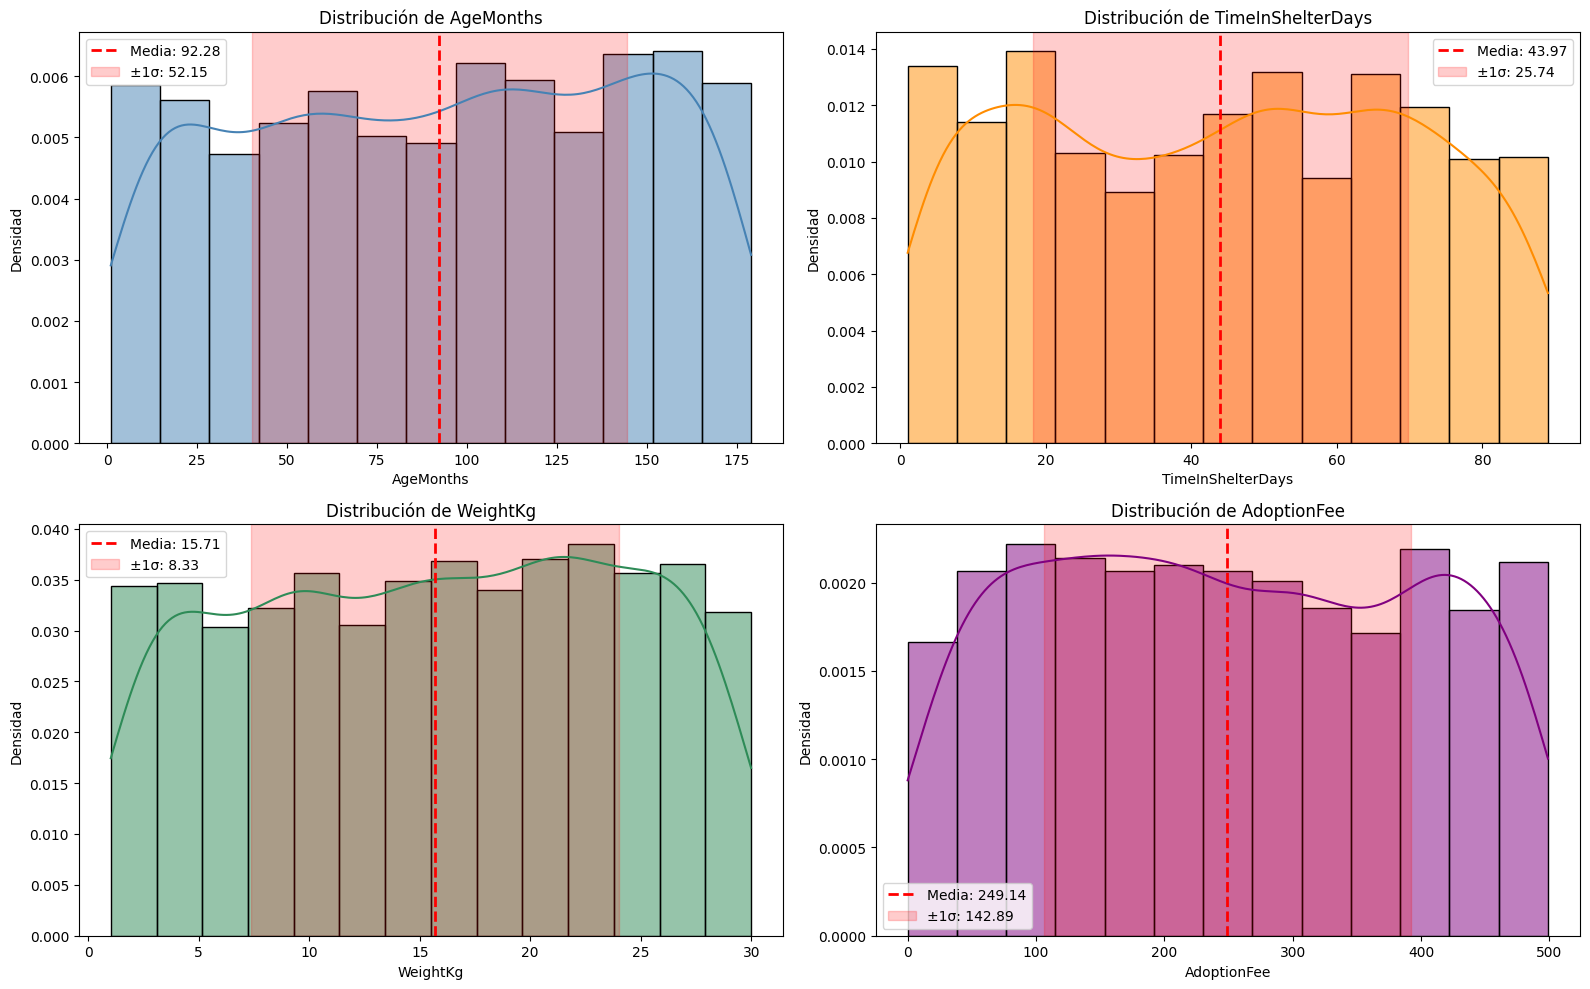

In [ ]:
def plot_distribution(ax, data, label, color='dodgerblue'):
    sns.histplot(data, kde=True, ax=ax, color=color, stat='density', edgecolor='black')
    ax.set_title(f'Distribución de {label}')
    ax.set_xlabel(label)
    ax.set_ylabel('Densidad')

    # Línea de media y desvío
    mean = data.mean()
    std = data.std()
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
    ax.axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1σ: {std:.2f}')
    ax.legend()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

plot_distribution(axes[0, 0], df['AgeMonths'], 'AgeMonths', color='steelblue')
plot_distribution(axes[0, 1], df['TimeInShelterDays'], 'TimeInShelterDays', color='darkorange')
plot_distribution(axes[1, 0], df['WeightKg'], 'WeightKg', color='seagreen')
plot_distribution(axes[1, 1], df['AdoptionFee'], 'AdoptionFee', color='purple')

plt.tight_layout()
plt.show()

In [ ]:
bins = range(int(df['TimeInShelterDays'].min()), int(df['TimeInShelterDays'].max()) + 2)

# Llamada modificada SOLO para TimeInShelterDays
sns.histplot(
    df['TimeInShelterDays'],
    bins=bins,
    kde=False,
    ax=axes[0, 1],
    color='darkorange',
    stat='density',
    edgecolor='black'
)
axes[0, 1].set_title('Distribución de TimeInShelterDays')
axes[0, 1].set_xlabel('TimeInShelterDays')
axes[0, 1].set_ylabel('Densidad')

# Añadir media y desviación estándar
mean = df['TimeInShelterDays'].mean()
std = df['TimeInShelterDays'].std()
axes[0, 1].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
axes[0, 1].axvspan(mean - std, mean + std, color='red', alpha=0.2, label=f'±1σ: {std:.2f}')
axes[0, 1].legend()
plt.show()

##### Matriz de correlación entre las variables

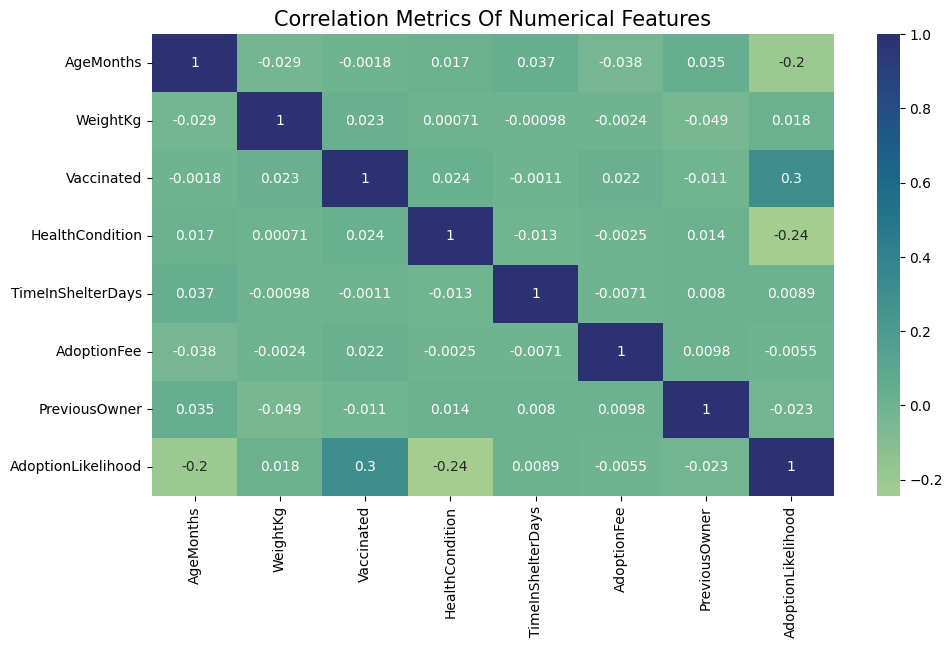

In [ ]:
plt.figure(figsize=(11,6))
sns.heatmap(df.loc[:, df.columns != 'PetID'].corr(numeric_only=True),annot=True, cmap='crest')
plt.title('Correlation Metrics Of Numerical Features', fontsize=15)
plt.show()

##### Análisis de datos booleanos en relación con el tiempo que pasa una mascota en el albergue

/tmp/ipython-input-18-2492465265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
/tmp/ipython-input-18-2492465265.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[1], palette='pastel', inner='quartile')
/tmp/ipython-input-18-2492465265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
/tmp/ipython-input-18-2492465265.py:14:

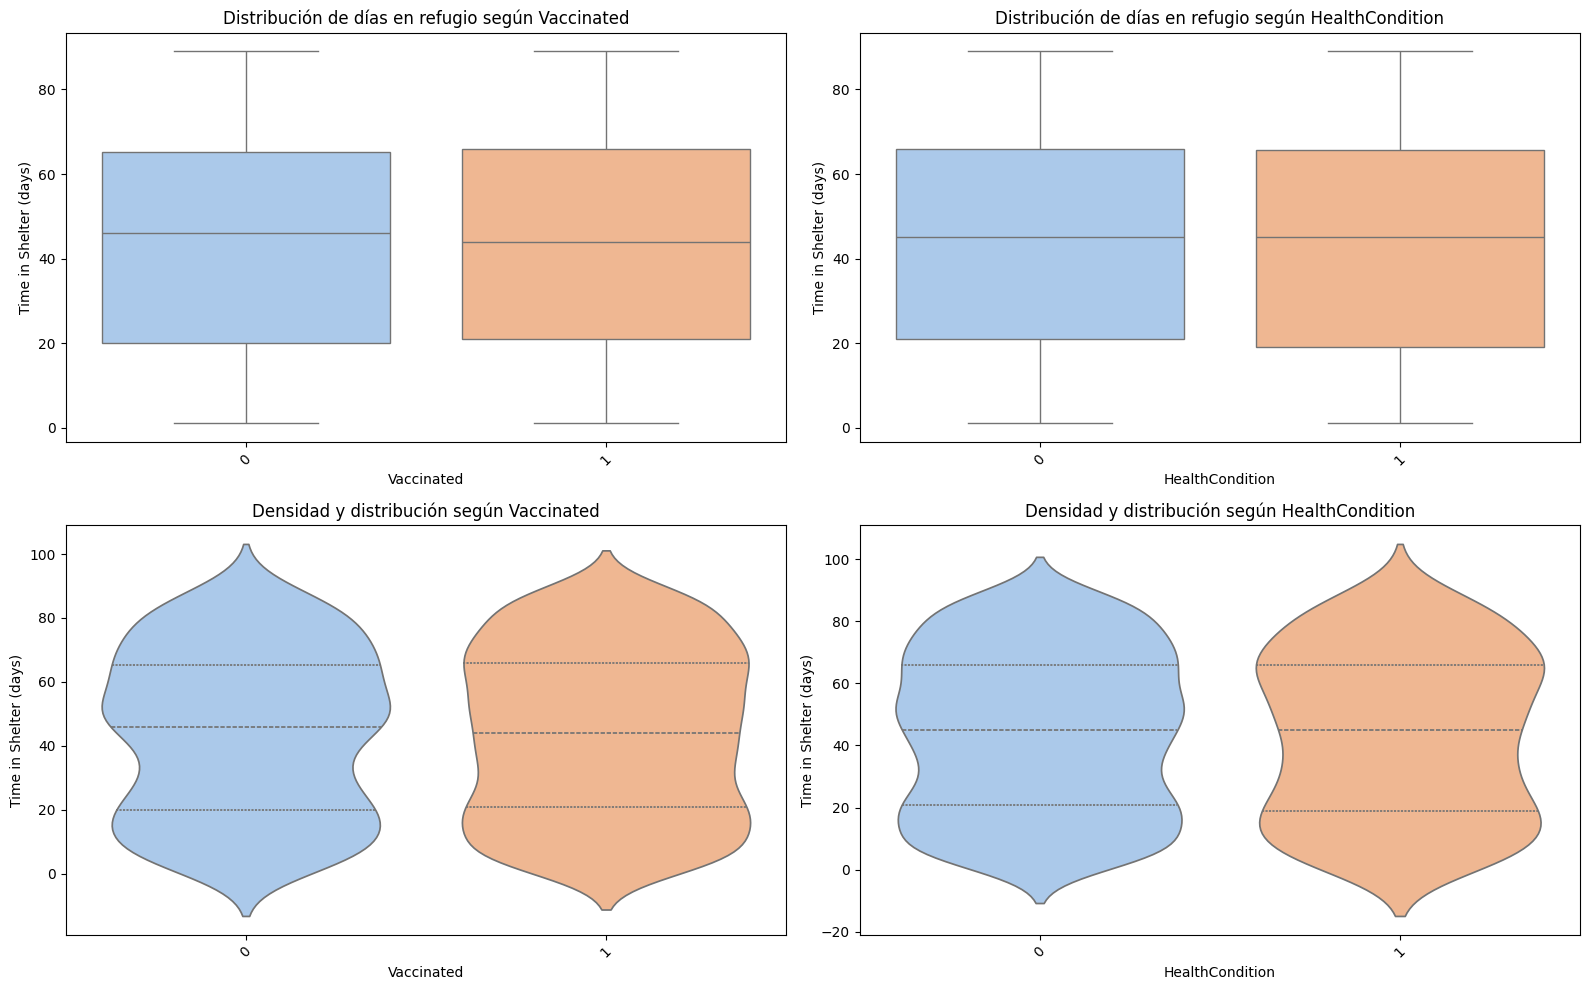

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_and_violin(df, feature_col, axes, color='skyblue'):
    # Boxplot
    sns.boxplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[0], palette='pastel')
    axes[0].set_title(f'Distribución de días en refugio según {feature_col}')
    axes[0].set_xlabel(feature_col)
    axes[0].set_ylabel('Time in Shelter (days)')
    axes[0].tick_params(axis='x', rotation=45)

    # Violinplot (opcional)
    sns.violinplot(x=feature_col, y='TimeInShelterDays', data=df, ax=axes[1], palette='pastel', inner='quartile')
    axes[1].set_title(f'Densidad y distribución según {feature_col}')
    axes[1].set_xlabel(feature_col)
    axes[1].set_ylabel('Time in Shelter (days)')
    axes[1].tick_params(axis='x', rotation=45)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Graficar para 'Vaccinated'
plot_box_and_violin(df, 'Vaccinated', [axes[0, 0], axes[1, 0]])

# Graficar para 'HealthCondition'
plot_box_and_violin(df, 'HealthCondition', [axes[0, 1], axes[1, 1]])

plt.tight_layout()
plt.show()


##### Datos que corresponden a booleanos

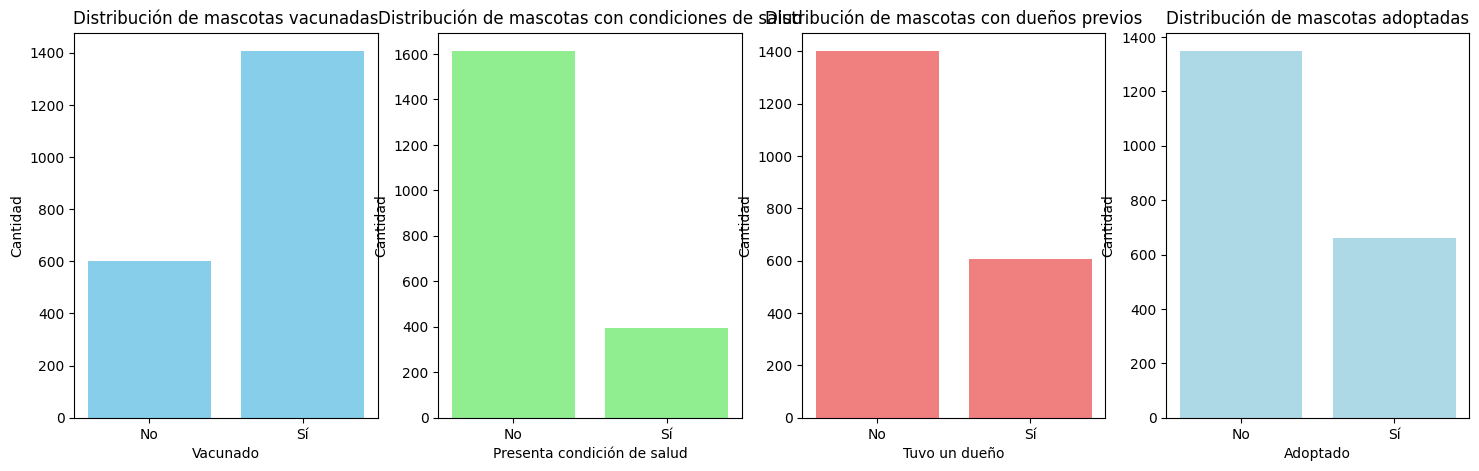

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64


In [ ]:
def plot_boolean_column(df, column, position, title, xlabel, color):
  column_counts = df[column].value_counts()
  axes[position].bar(column_counts.index, column_counts.values, color=color)
  axes[position].set_title(title)
  axes[position].set_xlabel(xlabel)
  axes[position].set_ylabel('Cantidad')
  axes[position].set_xticks([0, 1])
  axes[position].set_xticklabels(['No', 'Sí'])
  axes[position].tick_params(axis='x', rotation=0)

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

plot_boolean_column(df, 'Vaccinated', 0, 'Distribución de mascotas vacunadas', 'Vacunado', 'skyblue')
plot_boolean_column(df, 'HealthCondition', 1, 'Distribución de mascotas con condiciones de salud', 'Presenta condición de salud', 'lightgreen')
plot_boolean_column(df, 'PreviousOwner', 2, 'Distribución de mascotas con dueños previos', 'Tuvo un dueño', 'lightcoral')
plot_boolean_column(df, 'AdoptionLikelihood', 3, 'Distribución de mascotas adoptadas', 'Adoptado', 'lightblue')

plt.show()

print(df['AdoptionLikelihood'].value_counts())

### Preprocesado de los datos

#### Normalización de datos

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['AgeMonths'] = scaler.fit_transform(df[['AgeMonths']])
df['WeightKg'] = scaler.fit_transform(df[['WeightKg']])
df['AdoptionFee'] = scaler.fit_transform(df[['AdoptionFee']])
df['TimeInShelterDays'] = scaler.fit_transform(df[['TimeInShelterDays']])
print(df.head)

<bound method NDFrame.head of       PetID PetType             Breed  AgeMonths   Color    Size  WeightKg  \
0       500    Bird          Parakeet   0.730337  Orange   Large  0.138783   
1       501  Rabbit            Rabbit   0.404494   White   Large  0.520009   
2       502     Dog  Golden Retriever   0.758427  Orange  Medium  0.036514   
3       503    Bird          Parakeet   0.539326   White   Small  0.080105   
4       504  Rabbit            Rabbit   0.685393    Gray   Large  0.672244   
...     ...     ...               ...        ...     ...     ...       ...   
2002   2502     Dog            Poodle   0.398876  Orange   Small  0.897969   
2003   2503  Rabbit            Rabbit   0.691011   Brown   Small  0.127988   
2004   2504  Rabbit            Rabbit   0.629213  Orange   Small  0.025551   
2005   2505     Dog          Labrador   0.061798    Gray   Large  0.688239   
2006   2506  Rabbit            Rabbit   0.702247   White  Medium  0.603973   

      Vaccinated  HealthCondition

In [ ]:
# Descripción de las variables numéricas que no son binarias
df[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']].describe()

,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee
count,2007.000000,2007.000000,2007.000000,2007.000000
mean,0.512806,0.506863,0.488342,0.499283
std,0.292968,0.287387,0.292503,0.286347
min,0.000000,0.000000,0.000000,0.000000
25%,0.264045,0.266145,0.227273,0.254509
50%,0.522472,0.514442,0.500000,0.484970
75%,0.769663,0.749514,0.738636,0.751503
max,1.000000,1.000000,1.000000,1.000000


#### Codificación de datos categóricos no ordinales

In [ ]:
df['PetType'] = df['PetType'].astype("category")
df['Breed'] = df['Breed'].astype("category")
df['Color'] = df['Color'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PetID               2007 non-null   int64   
 1   PetType             2007 non-null   category
 2   Breed               2007 non-null   category
 3   AgeMonths           2007 non-null   float64 
 4   Color               2007 non-null   category
 5   Size                2007 non-null   object  
 6   WeightKg            2007 non-null   float64 
 7   Vaccinated          2007 non-null   int64   
 8   HealthCondition     2007 non-null   int64   
 9   TimeInShelterDays   2007 non-null   float64 
 10  AdoptionFee         2007 non-null   float64 
 11  PreviousOwner       2007 non-null   int64   
 12  AdoptionLikelihood  2007 non-null   int64   
dtypes: category(3), float64(4), int64(5), object(1)
memory usage: 163.6+ KB


In [ ]:
codificador = OneHotEncoder()

cod_type = codificador.fit_transform(df[['PetType']])
columns_pettype = codificador.categories_[0]
cols_type = pd.DataFrame(cod_type.toarray(), columns=[f"PetType_{cat}" for cat in columns_pettype])
df = pd.concat([df, cols_type], axis='columns')

cod_breed = codificador.fit_transform(df[['Breed']])
columns_breed = codificador.categories_[0]
cols_breed = pd.DataFrame(cod_breed.toarray(), columns=[f"Breed_{b}" for b in columns_breed])
df = pd.concat([df, cols_breed], axis='columns')

cod_color = codificador.fit_transform(df[['Color']])
columns_color = codificador.categories_[0]
cols_color = pd.DataFrame(cod_color.toarray(), columns=[f"Color_{c}" for c in columns_color])
df = pd.concat([df, cols_color], axis='columns')

In [ ]:
df.drop("PetID", axis='columns', inplace=True)
df.drop("PetType", axis='columns', inplace=True)
df.drop("Breed", axis='columns', inplace=True)
df.drop("Color", axis='columns', inplace=True)

In [ ]:
df

,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Bird,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,0.730337,Large,0.138783,1,0,0.295455,0.280561,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.404494,Large,0.520009,0,0,0.079545,0.470942,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.758427,Medium,0.036514,0,0,0.954545,0.771543,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.539326,Small,0.080105,0,0,0.681818,0.434870,1,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.685393,Large,0.672244,0,0,0.306818,0.028056,1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.398876,Small,0.897969,1,0,0.738636,0.052104,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,0.691011,Small,0.127988,1,1,0.659091,0.300601,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,0.629213,Small,0.025551,1,0,0.761364,0.605210,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,0.061798,Large,0.688239,1,0,0.659091,0.957916,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.columns

Index(['AgeMonths', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'AdoptionLikelihood', 'PetType_Bird', 'PetType_Cat', 'PetType_Dog',
       'PetType_Rabbit', 'Breed_Golden Retriever', 'Breed_Labrador',
       'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit',
       'Breed_Siamese', 'Color_Black', 'Color_Brown', 'Color_Gray',
       'Color_Orange', 'Color_White'],
      dtype='object')

#### Codificación de datos categóricos ordinales

In [ ]:
size_categories = ["Small", "Medium", "Large"]
ordencoder = OrdinalEncoder(categories=[size_categories])

datos_ord = pd.DataFrame(ordencoder.fit_transform(df[['Size']]), columns=["Size"])
print(datos_ord)

df = pd.concat([df, datos_ord], axis = 'columns')

df

      Size
0      2.0
1      2.0
2      1.0
3      0.0
4      2.0
...    ...
2002   0.0
2003   0.0
2004   0.0
2005   2.0
2006   1.0

[2007 rows x 1 columns]


,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Bird,...,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White,Size
0,0.730337,Large,0.138783,1,0,0.295455,0.280561,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,0.404494,Large,0.520009,0,0,0.079545,0.470942,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.758427,Medium,0.036514,0,0,0.954545,0.771543,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.539326,Small,0.080105,0,0,0.681818,0.434870,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.685393,Large,0.672244,0,0,0.306818,0.028056,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.398876,Small,0.897969,1,0,0.738636,0.052104,1,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2003,0.691011,Small,0.127988,1,1,0.659091,0.300601,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2004,0.629213,Small,0.025551,1,0,0.761364,0.605210,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2005,0.061798,Large,0.688239,1,0,0.659091,0.957916,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


Borramos también la columna Breed_Rabbit ya que expresa lo mismo que PetType_Rabbit, por lo que es información redundante

In [ ]:
df.drop("Size", axis='columns', inplace=True)
df.drop("Breed_Rabbit", axis='columns', inplace=True)

In [ ]:
df.columns

Index(['AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'AdoptionLikelihood', 'PetType_Bird', 'PetType_Cat', 'PetType_Dog',
       'PetType_Rabbit', 'Breed_Golden Retriever', 'Breed_Labrador',
       'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Siamese',
       'Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange',
       'Color_White'],
      dtype='object')

In [ ]:
df.to_csv("data_class.csv", index=False)